In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import joblib

## Load and Explore Dataset

In [94]:
data = pd.read_csv("Housing.csv")
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [95]:
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [96]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


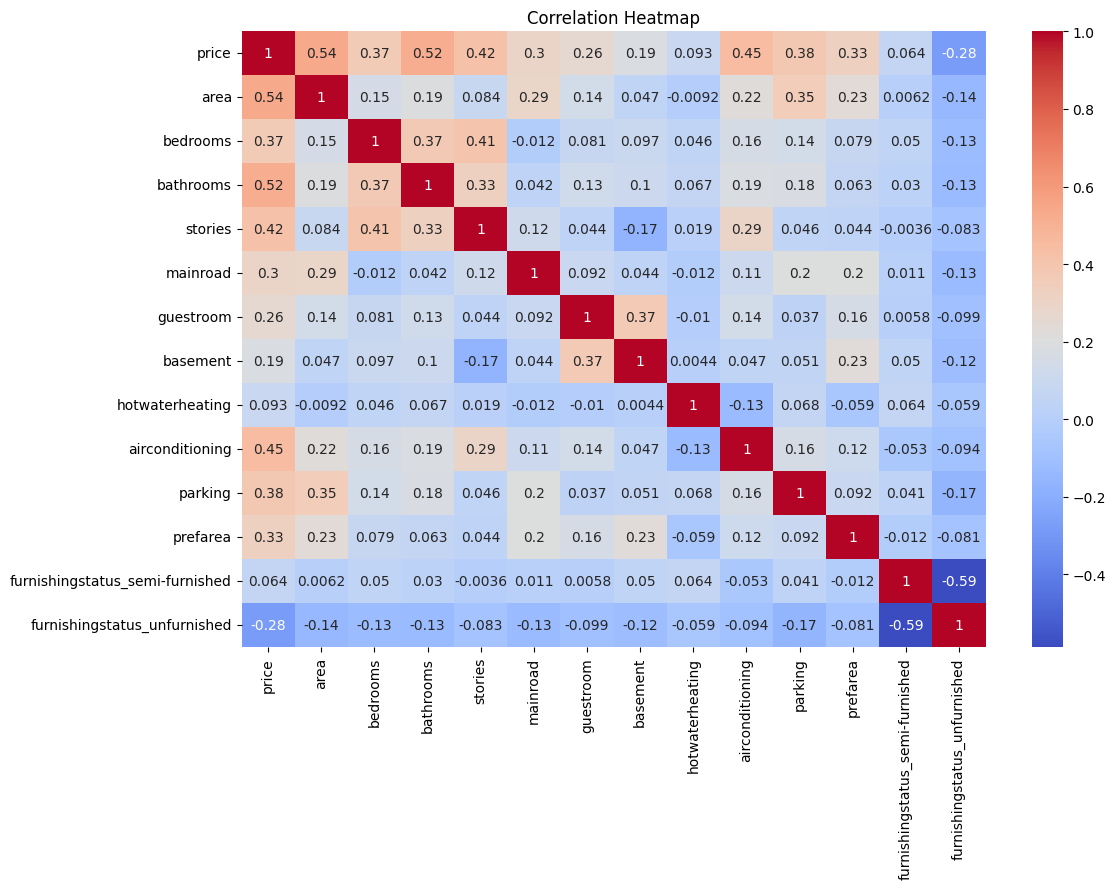

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Data Preprocessing

In [97]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for x in yes_no_cols:
    data [x] = data [x].map({ 'yes':1 , 'no': 0})

In [98]:
data = pd.get_dummies( data , columns=['furnishingstatus'] ,drop_first = True ,dtype=int)

In [99]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


## Select Features and Split Dataset

In [101]:
X = data[['area', 'bathrooms', 'airconditioning', 'stories',
          'parking', 'bedrooms', 'prefarea', 'mainroad',
          'furnishingstatus_unfurnished']]
Y = data['price']

In [102]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size =0.2 , random_state =42)

## Train Linear Regression Model

In [103]:
model = LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
Y_pred = model.predict(X_test)

## Evaluate Model

In [105]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

print("Model Performance:\n")
print("RMSE =", rmse)
print("R² =", r2)

Model Performance:

RMSE = 1355311.2688588647
R² = 0.6365925200428808


In [106]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("Coefficients for each feature:\n")
print(coeff)


Coefficients for each feature:

                        Feature   Coefficient
0                          area  2.360159e+02
1                     bathrooms  1.155908e+06
2               airconditioning  8.222509e+05
3                       stories  3.465020e+05
4                       parking  2.283081e+05
5                      bedrooms  1.166322e+05
6                      prefarea  7.298858e+05
7                      mainroad  3.944885e+05
8  furnishingstatus_unfurnished -4.091446e+05


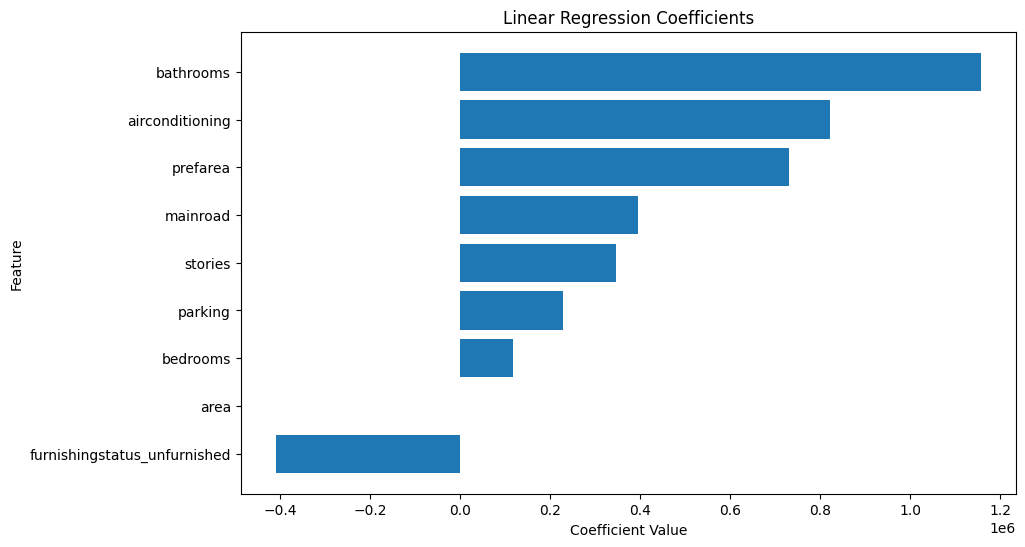

In [107]:
coeff_sorted = coeff.sort_values(by="Coefficient")

plt.figure(figsize=(10,6))
plt.barh(coeff_sorted["Feature"], coeff_sorted["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()

## Save Model

In [108]:
joblib.dump(model, "house_price_model.pkl")
print("\nModel saved as 'house_price_model.pkl'")


Model saved as 'house_price_model.pkl'


## Show Example Predictions

In [109]:
example_predictions = pd.DataFrame({
    "Actual Price": Y_test[:5].values,
    "Predicted Price": Y_pred[:5],
})

example_predictions["Error"] = example_predictions["Actual Price"] - example_predictions["Predicted Price"]

print("\nExample Predictions with Error:")
print(example_predictions)


Example Predictions with Error:
   Actual Price  Predicted Price         Error
0       4060000     4.957181e+06 -8.971815e+05
1       6650000     7.456123e+06 -8.061226e+05
2       3710000     3.357843e+06  3.521571e+05
3       6440000     4.869803e+06  1.570197e+06
4       2800000     3.455594e+06 -6.555938e+05
